In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import isodate
import time
from wordcloud import WordCloud, STOPWORDS

from googleapiclient.discovery import build 

## Fetching data for multiple channels and analyzing Free Code Camp Youtube channel through Youtube API

- Following fields are fetched:
    - Video ID
    - Title
    - Video Views
    - Video Likes count
    - Video Comments count
    - Video Duration
    - Videos URL
    
### Analysis 
- Total Videos 
- Top five viewed videos
- Top Liked and disliked videos
- Total Views
- Total number of Python Courses in dataframe
- Most views videos
- Videos by months and week days
- View ration of Python videos
- Liked Percentage ratio with respect to views
- Plotting different charts
- Creating a WordCloud

In [1]:

api_key = "****************"

channel_id = 'UC8butISFwT-Wl7EV0hUK0BQ'

In [3]:
# Creating youtube services
youtube = build('youtube', 'v3', developerKey=api_key)

In [69]:
# general search for chat gpt videos 

search_response=youtube.search().list(part='snippet',q='chatgpt',maxResults=25,type='video')
search_response.execute()

{'kind': 'youtube#searchListResponse',
 'etag': 'XlUtotQVe48E4pPTDMRNSweF6lk',
 'nextPageToken': 'CBkQAA',
 'regionCode': 'IN',
 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 25},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'gP8kk7EMcfN2Pk-OR26j9spcbWc',
   'id': {'kind': 'youtube#video', 'videoId': 'xqOvSDBJeqM'},
   'snippet': {'publishedAt': '2023-08-21T12:30:11Z',
    'channelId': 'UCFAr3FQxRhSzVNOD3vq1gMQ',
    'title': 'Awesome Trick to earn Rs. 435  in just 1 hour using ChatGPT 🚀 - (Product Description work)',
    'description': 'chatgpt #ai #earnmoneyonline FREE Live Masterclass. Register Now. https://event.webinarjam.com/register/17/701x7u9 .',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/xqOvSDBJeqM/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/xqOvSDBJeqM/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/xqOvSDBJeqM/hqdefault.jpg'

In [4]:
# get channel statistisc data for FreeCodeCamp Channel

def get_channel_data(youtube, channel_id):
    request = youtube.channels().list(
        part='snippet, contentDetails, statistics',
        id=channel_id        
    )
    response = request.execute()
    data = dict(Name = response['items'][0]['snippet']['title'],
                Subs_count=response['items'][0]['statistics']['subscriberCount'],
                Views=response['items'][0]['statistics']['viewCount'],
                Videos_count=response['items'][0]['statistics']['videoCount']
               
               
               )
    
    
    return data

In [5]:
# get_channel_data(youtube, channel_id)

In [6]:
channel_ids = [
    'UC8butISFwT-Wl7EV0hUK0BQ',
    'UC8uU_wruBMHeeRma49dtZKA',
    'UCCezIgC97PvUuR4_gbFUs5g',
    'UC4SVo0Ue36XCfOyb5Lh1viQ',
    'UC29ju8bIPH5as8OGnQzwJyA',
    'UCeVMnSShP_Iviwkknt83cww',
    'UCsBjURrPoezykLs9EqgamOA',
    'UC4JX40jDee_tINbkjycV4Sg',
    'UCWv7vMbMWH4-V0ZXdmDpPBA',
    'UC80PWRj_ZU8Zu0HSMNVwKWw',
    'UCcabW7890RKJzL968QWEykA'
]

In [7]:
# get multiple channel statistisc

def get_channels_stats(youtube, channel_ids):
    channels_data = []
    request = youtube.channels().list(
        part='snippet, contentDetails, statistics',
        id=','.join(channel_ids)        
    )
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Name = response['items'][i]['snippet']['title'],
                Subs_count=response['items'][i]['statistics']['subscriberCount'],
                Views=response['items'][i]['statistics']['viewCount'],
                Videos_count=response['items'][i]['statistics']['videoCount'],
                Playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                              
               )
        channels_data.append(data)
    
    
    return channels_data

In [8]:
channels_stats = get_channels_stats(youtube, channel_ids)

In [9]:
channels_df = pd.DataFrame(channels_stats)

In [10]:
channels_df

,Name,Subs_count,Views,Videos_count,Playlist_id
0,Fireship,2440000,317480785,584,UUsBjURrPoezykLs9EqgamOA
1,Programming with Mosh,3530000,177493233,177,UUWv7vMbMWH4-V0ZXdmDpPBA
2,Corey Schafer,1200000,89189244,232,UUCezIgC97PvUuR4_gbFUs5g
3,freeCodeCamp.org,8380000,599493627,1514,UU8butISFwT-Wl7EV0hUK0BQ
4,CodeWithHarry,4490000,633283736,2141,UUeVMnSShP_Iviwkknt83cww
5,Bro Code,1260000,60104238,638,UU4SVo0Ue36XCfOyb5Lh1viQ
6,Codevolution,554000,101976220,1475,UU80PWRj_ZU8Zu0HSMNVwKWw
7,Traversy Media,2140000,203644489,957,UU29ju8bIPH5as8OGnQzwJyA
8,Tech With Tim,1330000,124116868,921,UU4JX40jDee_tINbkjycV4Sg
9,CS50,1580000,100414937,2086,UUcabW7890RKJzL968QWEykA


In [11]:
channels_df.dtypes

Name            object
Subs_count      object
Views           object
Videos_count    object
Playlist_id     object
dtype: object

In [12]:
# conveting datypes
channels_df['Subs_count']= pd.to_numeric(channels_df['Subs_count'])
channels_df['Views']= pd.to_numeric(channels_df['Views'])
channels_df['Videos_count']= pd.to_numeric(channels_df['Videos_count'])

In [13]:
channels_df.dtypes

Name            object
Subs_count       int64
Views            int64
Videos_count     int64
Playlist_id     object
dtype: object

### Channels Subscribers Count

<AxesSubplot:xlabel='Name', ylabel='Subs_count'>

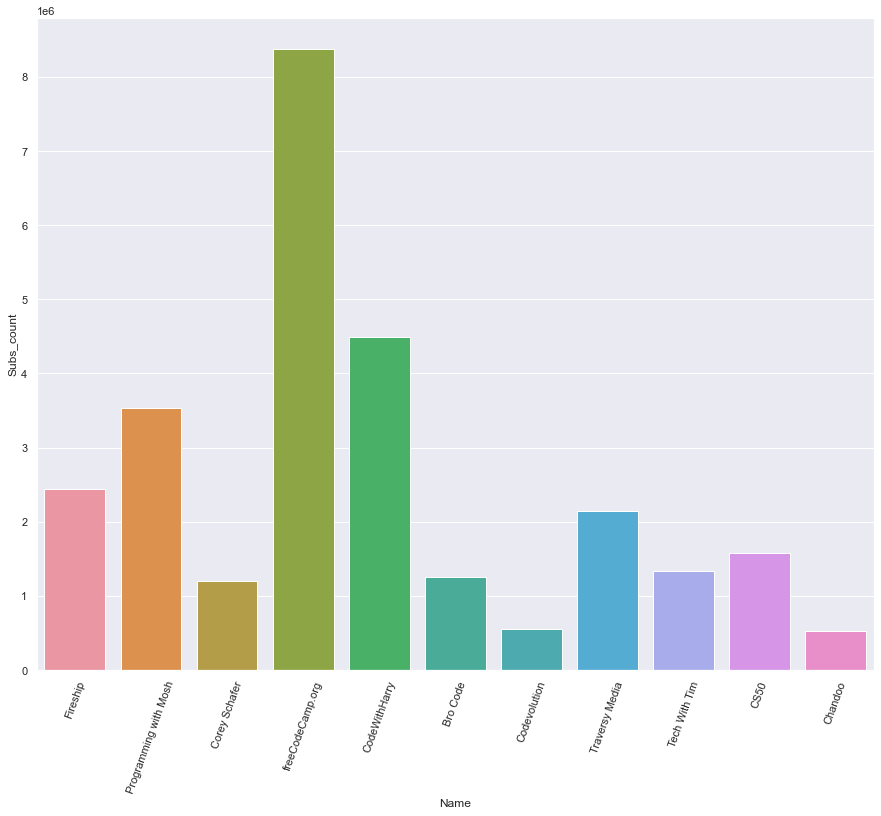

In [14]:
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=70)
sns.barplot(x='Name',y='Subs_count', data=channels_df)

### Channels Total Views Count

<AxesSubplot:xlabel='Name', ylabel='Views'>

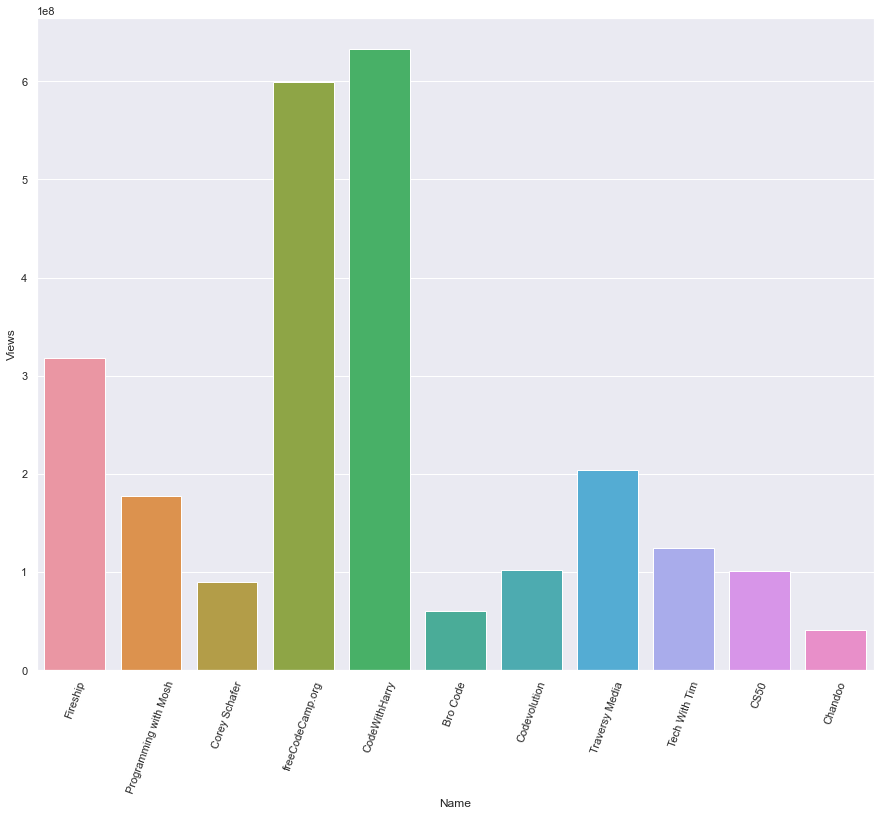

In [15]:
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=70)
sns.barplot(x='Name',y='Views', data=channels_df)

### Channels Videos Count

<AxesSubplot:xlabel='Name', ylabel='Videos_count'>

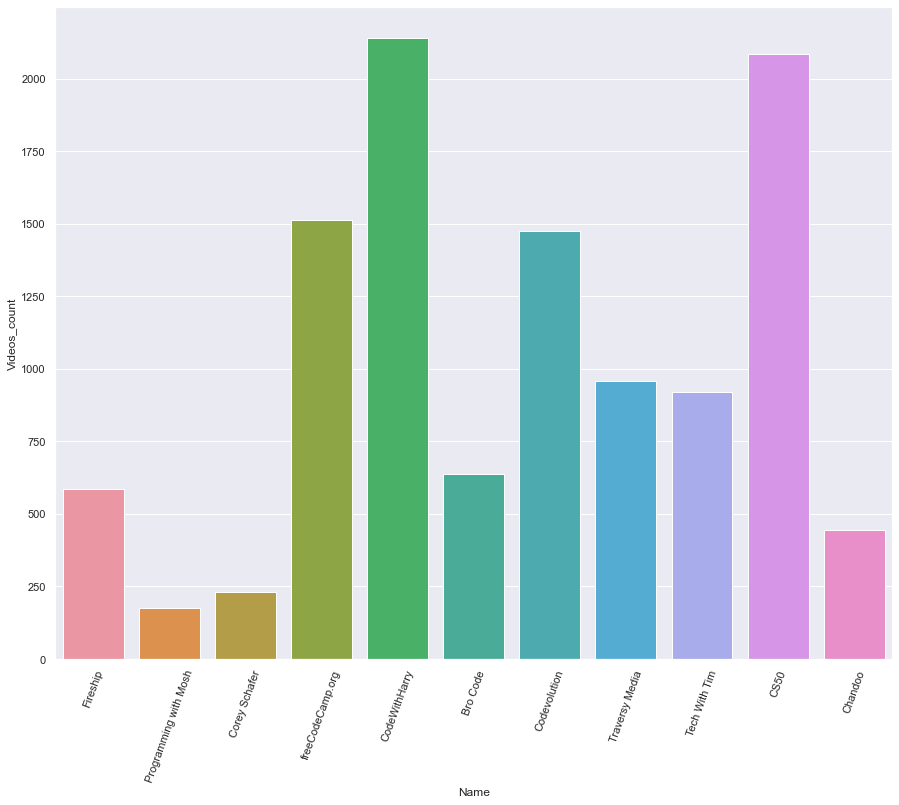

In [16]:
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=70)
sns.barplot(x='Name',y='Videos_count', data=channels_df)

In [17]:
playlist_id = channels_df.loc[channels_df['Name'] == 'freeCodeCamp.org','Playlist_id'].iloc[0]
playlist_id

'UU8butISFwT-Wl7EV0hUK0BQ'

### Fetching Videos Details From Playlist Id

In [18]:
def get_channel_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId  = playlist_id,
        maxResults=50
    )
    
    response = request.execute()
    video_ids = []
    for id in range(len(response['items'])):
        video_ids.append(response['items'][id]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages=True
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId  = playlist_id,
            maxResults=50,
                pageToken= next_page_token
            )
            response = request.execute()
            
            for id in range(len(response['items'])):
                video_ids.append(response['items'][id]['contentDetails']['videoId'])
        
            next_page_token = response.get('nextPageToken')
            
    
    return video_ids

In [19]:
channel_vedio_ids = get_channel_video_ids(youtube, playlist_id)

In [20]:
channel_vedio_ids

['GdzRzWymT4c',
 'fTPCKnZZ2dk',
 'hagBB17_hvg',
 '6oMoHZZeyb0',
 '5Sm9IVMet9c',
 'nkGjob3q2GI',
 'qwAFL1597eM',
 'r895rFUbGtE',
 'yfHHvmaMkcA',
 'EJHPltmAULA',
 'Uh5LhXAIyCw',
 'oFkDldu3C_4',
 'TV6tFPfz0go',
 'gwOVynGnDZA',
 '_ZvnD73m40o',
 'KeBxopnhizw',
 '5199E50O7SI',
 '-42K44A1oMA',
 'YYe0FdfdgDU',
 '3wwiOSxDAmg',
 '6GQAE7iLOhY',
 'UU1WVnMk4E8',
 'KBDSJU3cGkc',
 '_DFa26ep-h4',
 'tS8F7_X2qB0',
 'Wn3IPX_ax-0',
 'QKKvMx_7gdA',
 '1m8NRrLLgkg',
 'xZDB1naRUlk',
 'SPcwo0Gq9T8',
 'enb5kTJwV_s',
 'dMkiOex_cKU',
 'cE3YzKsQvEM',
 'N07nQ-uUsww',
 '5NgNicANyqM',
 'j1laALb8OVM',
 'ft-hs2a_zno',
 'u8vMu7viCm8',
 'kxyAk_K-wE4',
 '8m3LvPg8EuI',
 'agEPmYdbQLs',
 'FJAO6jDYljs',
 'ETV17M4SauU',
 '8M3YqhO3kVs',
 'QdxUZhLHZiA',
 '0tM-l_ZsxjU',
 'zp5Jh2FIpF0',
 'VCayKl82Lt8',
 '1WpKsY9LBlY',
 'nVhau51w6dM',
 'YT8s-90oDC0',
 'gtjxAH8uaP0',
 'dU7GwCOgvNY',
 'MIL2BK02X8A',
 'ZTPcRWK0ytE',
 'BpPEoZW5IiY',
 'IA3WxTTPXqQ',
 '_IgbB24scLI',
 'jlogLBkPZ2A',
 'GnodscC2p-A',
 'qrZGfBBlXpk',
 'FRmCxj9K7II',
 'GizsSo

### Fetching Videos details

In [107]:
def get_video_details(youtube, video_ids):
    all_videos_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                part='snippet,statistics, contentDetails',
                id=','.join(video_ids[i:i+50])
                )
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title= video['snippet']['title'],
                Published_date= video['snippet']['publishedAt'],
                Views= video['statistics']['viewCount'],
                Likes=video['statistics'].get('likeCount'),
                favorite=video['statistics']['favoriteCount'], 
                Comments=video['statistics']['commentCount'],
                duration =video['contentDetails']['duration'],                               
                url=video['snippet']['thumbnails']['default']['url']
                              )
                   
            all_videos_stats.append(video_stats)        
    return all_videos_stats 

In [108]:
fcc_data = get_video_details(youtube, channel_vedio_ids)

In [109]:
fcc_df = pd.DataFrame(fcc_data)

In [110]:
fcc_df.to_csv('FCCData.csv')

In [111]:
# FreecodeCamp Channel Data
fcc_df.head()

,Title,Published_date,Views,Likes,favorite,Comments,duration,url
0,Java Basics – Crash Course,2023-09-27T14:32:50Z,18271,1196,0,77,PT3H36M13S,https://i.ytimg.com/vi/GdzRzWymT4c/default.jpg
1,Nuxt 3 — Course for Beginners,2023-09-26T14:19:39Z,16885,578,0,35,PT3H10M29S,https://i.ytimg.com/vi/fTPCKnZZ2dk/default.jpg
2,Dynamic Programming – 0/1 Knapsack Problem Tut...,2023-09-25T14:54:24Z,18508,609,0,37,PT46M18S,https://i.ytimg.com/vi/hagBB17_hvg/default.jpg
3,Rust Project Tutorial – Authentication Server ...,2023-09-22T14:46:05Z,24764,586,0,27,PT1H35M50S,https://i.ytimg.com/vi/6oMoHZZeyb0/default.jpg
4,Mojo Programming Language – Full Course for Be...,2023-09-21T13:02:21Z,72474,2305,0,163,PT2H12M44S,https://i.ytimg.com/vi/5Sm9IVMet9c/default.jpg


In [26]:
fcc_df['Published_date'] = pd.to_datetime(fcc_df['Published_date']).dt.date
fcc_df['Views']=pd.to_numeric(fcc_df['Views'])
fcc_df['Likes']=pd.to_numeric(fcc_df['Likes'])
fcc_df['favorite']=pd.to_numeric(fcc_df['favorite'])
fcc_df['Comments']=pd.to_numeric(fcc_df['Comments'])

In [32]:
top_10_videos

,Title,Published_date,Views,Likes,favorite,Comments,url
941,Learn Python - Full Course for Beginners [Tuto...,2018-07-11,41859379,1001005.0,0,43758,https://i.ytimg.com/vi/rfscVS0vtbw/default.jpg
958,SQL Tutorial - Full Database Course for Beginners,2018-07-02,16404585,313305.0,0,10635,https://i.ytimg.com/vi/HXV3zeQKqGY/default.jpg
748,Learn JavaScript - Full Course for Beginners,2018-12-10,15898173,244144.0,0,8315,https://i.ytimg.com/vi/PkZNo7MFNFg/default.jpg
888,C++ Tutorial for Beginners - Full Course,2018-08-24,11569518,270380.0,0,12136,https://i.ytimg.com/vi/vLnPwxZdW4Y/default.jpg
900,C Programming Tutorial for Beginners,2018-08-15,9961647,178601.0,0,6470,https://i.ytimg.com/vi/KJgsSFOSQv0/default.jpg
152,Harvard CS50 – Full Computer Science Universit...,2022-10-19,8855720,361488.0,0,6439,https://i.ytimg.com/vi/8mAITcNt710/default.jpg
470,Microsoft Excel Tutorial for Beginners - Full ...,2020-10-28,7568667,125733.0,0,2055,https://i.ytimg.com/vi/Vl0H-qTclOg/default.jpg
870,C# Tutorial - Full Course for Beginners,2018-09-06,7436697,166188.0,0,8384,https://i.ytimg.com/vi/GhQdlIFylQ8/default.jpg
575,Introduction to Programming and Computer Scien...,2020-04-21,7293396,177870.0,0,3671,https://i.ytimg.com/vi/zOjov-2OZ0E/default.jpg
846,HTML Full Course - Build a Website Tutorial,2018-09-18,7028013,169563.0,0,5836,https://i.ytimg.com/vi/pQN-pnXPaVg/default.jpg


### Exploratory Data Analysis

In [203]:
# Monthly data

fcc_df['Month'] = pd.to_datetime(fcc_df['Published_date']).dt.strftime('%b')

In [45]:
videos_per_month = fcc_df.groupby('Month', as_index=False).size()

In [46]:
videos_per_month

,Month,size
0,Apr,103
1,Aug,161
2,Dec,79
3,Feb,111
4,Jan,101
5,Jul,166
6,Jun,132
7,Mar,132
8,May,135
9,Nov,102


### Data Pre-Processing

In [118]:
fcc_df.isnull().any()

Title             False
Published_date    False
Views             False
Likes              True
favorite          False
Comments          False
duration          False
url               False
dtype: bool

In [120]:
fcc_df.dtypes

Title             object
Published_date    object
Views             object
Likes             object
favorite          object
Comments          object
duration          object
url               object
dtype: object

In [122]:
# converting datatypes
numeric_cols = ['Views','Likes','favorite','Comments']
fcc_df[numeric_cols] = fcc_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

#### Creating Month and Day Columns

In [124]:
fcc_df['Month'] = pd.to_datetime(fcc_df['Published_date']).dt.strftime('%b')

In [126]:
fcc_df['Day'] = pd.to_datetime(fcc_df['Published_date']).dt.strftime('%A')

#### Converting duration into seconds 

In [130]:
fcc_df['durationSeconds'] = fcc_df['duration'].apply(lambda x:isodate.parse_duration(x))
fcc_df['durationSeconds'] = fcc_df['durationSeconds'].astype('timedelta64[s]')

In [131]:
fcc_df.head()

,Title,Published_date,Views,Likes,favorite,Comments,duration,url,Month,Day,durationSeconds
0,Java Basics – Crash Course,2023-09-27T14:32:50Z,18271.0,1196.0,0.0,77.0,PT3H36M13S,https://i.ytimg.com/vi/GdzRzWymT4c/default.jpg,Sep,Wednesday,12973.0
1,Nuxt 3 — Course for Beginners,2023-09-26T14:19:39Z,16885.0,578.0,0.0,35.0,PT3H10M29S,https://i.ytimg.com/vi/fTPCKnZZ2dk/default.jpg,Sep,Tuesday,11429.0
2,Dynamic Programming – 0/1 Knapsack Problem Tut...,2023-09-25T14:54:24Z,18508.0,609.0,0.0,37.0,PT46M18S,https://i.ytimg.com/vi/hagBB17_hvg/default.jpg,Sep,Monday,2778.0
3,Rust Project Tutorial – Authentication Server ...,2023-09-22T14:46:05Z,24764.0,586.0,0.0,27.0,PT1H35M50S,https://i.ytimg.com/vi/6oMoHZZeyb0/default.jpg,Sep,Friday,5750.0
4,Mojo Programming Language – Full Course for Be...,2023-09-21T13:02:21Z,72474.0,2305.0,0.0,163.0,PT2H12M44S,https://i.ytimg.com/vi/5Sm9IVMet9c/default.jpg,Sep,Thursday,7964.0


In [ ]:
top_10_videos = fcc_df.sort_values(by='Views', ascending=False).head(10)

#### Most viewed videos

<AxesSubplot:xlabel='Views', ylabel='Title'>

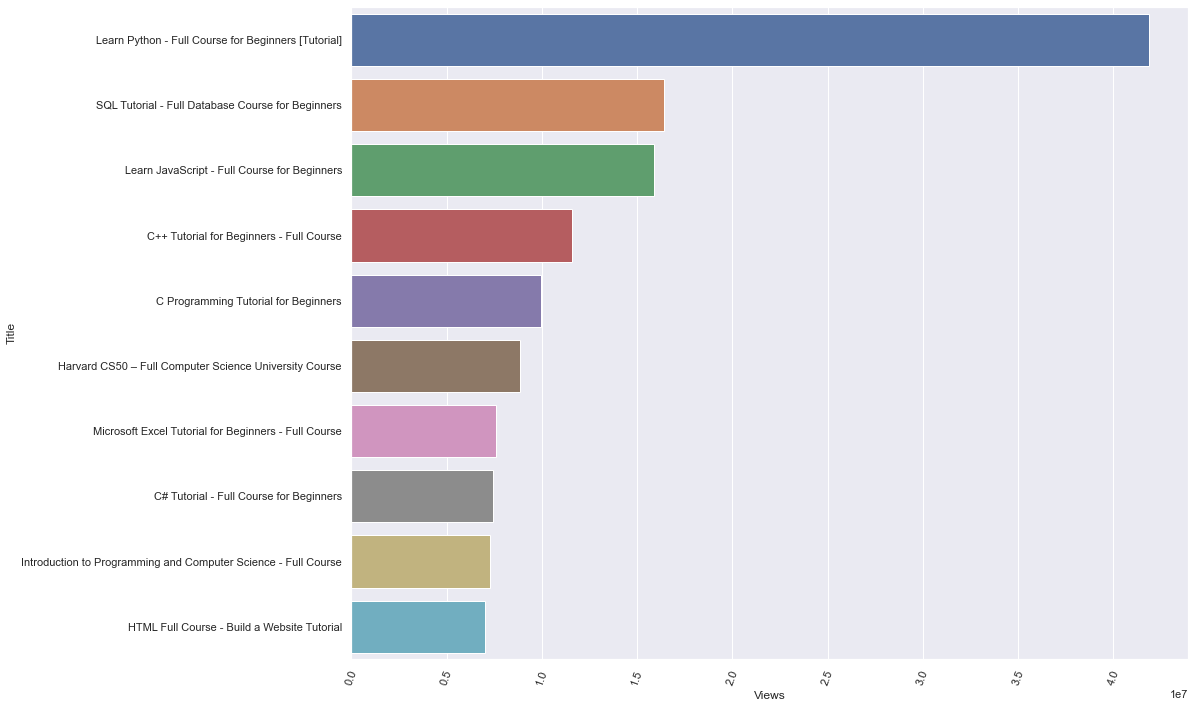

In [176]:
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=70)
sns.barplot(x='Views',y='Title', data=top_10_videos)


### Videos per month 

<AxesSubplot:xlabel='Month', ylabel='size'>

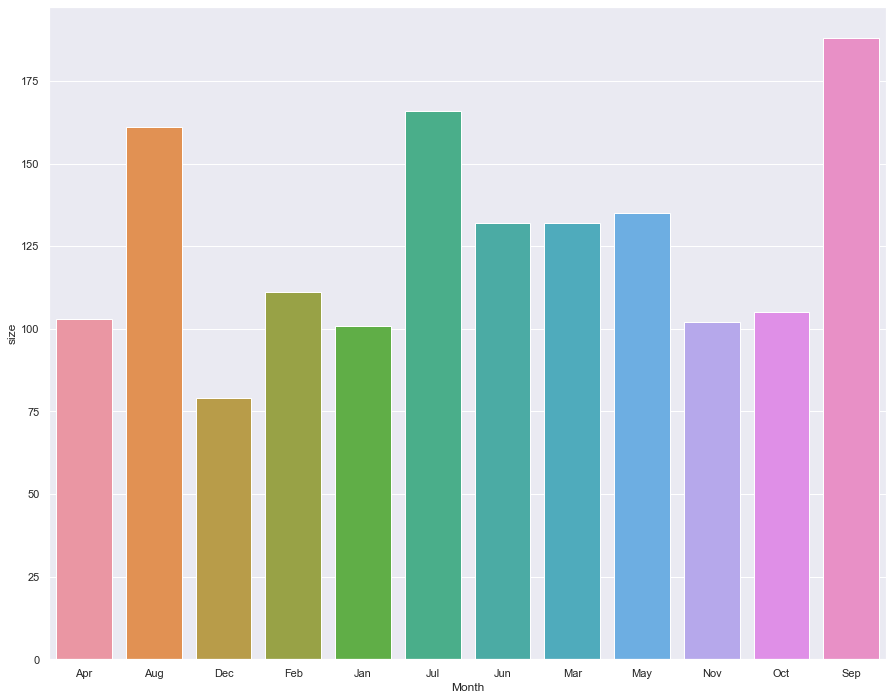

In [177]:

sns.barplot(x='Month', y='size', data=videos_per_month)

### Videos on Day Of The Week

In [169]:
videos_on_days = fcc_df.groupby('Day', as_index=False).size()

<AxesSubplot:xlabel='Day', ylabel='size'>

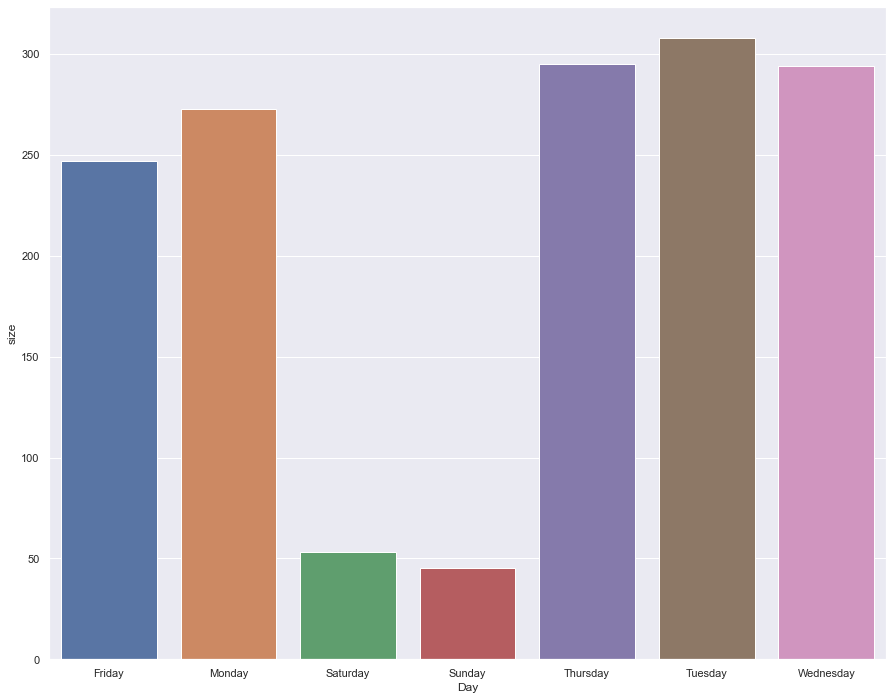

In [171]:
sns.barplot(x='Day', y='size', data=videos_on_days)

In [136]:
top_10_videos = fcc_df.sort_values(by='Views', ascending=False).head(10)

In [137]:
top_10_videos

,Title,Published_date,Views,Likes,favorite,Comments,duration,url,Month,Day,durationSeconds
941,Learn Python - Full Course for Beginners [Tuto...,2018-07-11T18:00:42Z,41859988.0,1001015.0,0.0,43758.0,PT4H26M52S,https://i.ytimg.com/vi/rfscVS0vtbw/default.jpg,Jul,Wednesday,16012.0
958,SQL Tutorial - Full Database Course for Beginners,2018-07-02T17:13:32Z,16405025.0,313311.0,0.0,10635.0,PT4H20M39S,https://i.ytimg.com/vi/HXV3zeQKqGY/default.jpg,Jul,Monday,15639.0
748,Learn JavaScript - Full Course for Beginners,2018-12-10T14:13:40Z,15898479.0,244149.0,0.0,8315.0,PT3H26M43S,https://i.ytimg.com/vi/PkZNo7MFNFg/default.jpg,Dec,Monday,12403.0
888,C++ Tutorial for Beginners - Full Course,2018-08-24T17:11:35Z,11569725.0,270386.0,0.0,12136.0,PT4H1M19S,https://i.ytimg.com/vi/vLnPwxZdW4Y/default.jpg,Aug,Friday,14479.0
900,C Programming Tutorial for Beginners,2018-08-15T17:52:20Z,9961969.0,178607.0,0.0,6470.0,PT3H46M13S,https://i.ytimg.com/vi/KJgsSFOSQv0/default.jpg,Aug,Wednesday,13573.0
152,Harvard CS50 – Full Computer Science Universit...,2022-10-19T13:53:35Z,8856444.0,361525.0,0.0,6439.0,P1DT51M37S,https://i.ytimg.com/vi/8mAITcNt710/default.jpg,Oct,Wednesday,89497.0
470,Microsoft Excel Tutorial for Beginners - Full ...,2020-10-28T13:09:30Z,7568973.0,125740.0,0.0,2055.0,PT2H26M10S,https://i.ytimg.com/vi/Vl0H-qTclOg/default.jpg,Oct,Wednesday,8770.0
870,C# Tutorial - Full Course for Beginners,2018-09-06T18:38:39Z,7436881.0,166192.0,0.0,8384.0,PT4H31M9S,https://i.ytimg.com/vi/GhQdlIFylQ8/default.jpg,Sep,Thursday,16269.0
575,Introduction to Programming and Computer Scien...,2020-04-21T13:45:02Z,7293642.0,177874.0,0.0,3671.0,PT1H59M9S,https://i.ytimg.com/vi/zOjov-2OZ0E/default.jpg,Apr,Tuesday,7149.0
846,HTML Full Course - Build a Website Tutorial,2018-09-18T17:02:21Z,7028078.0,169565.0,0.0,5836.0,PT2H2M32S,https://i.ytimg.com/vi/pQN-pnXPaVg/default.jpg,Sep,Tuesday,7352.0


In [184]:
likes_avg = top_10_videos['Views'].mean()
dislikes_avg = top_10_videos['Likes'].mean()
comment_avg = top_10_videos['Comments'].mean()

print(f"Top 10 Videos Views Average: {likes_avg}")
print(f"Top 10 Videos Likes Average: {dislikes_avg}")
print(f"Top 10 Videos Comments Average: {comment_avg}")

Top 10 Videos Views Average: 13387920.4
Top 10 Videos Likes Average: 300836.4
Top 10 Videos Comments Average: 10769.9


In [186]:
# Videos with max duration 

fcc_df[fcc_df['durationSeconds']==fcc_df['durationSeconds'].max()]

,Title,Published_date,Views,Likes,favorite,Comments,duration,url,Month,Day,durationSeconds
56,Deep Learning for Computer Vision with Python ...,2023-06-06T14:04:19Z,329259.0,10601.0,0.0,373.0,P1DT13H16M41S,https://i.ytimg.com/vi/IA3WxTTPXqQ/default.jpg,Jun,Tuesday,134201.0


### Python Videos
Videos where python exists in title

In [187]:
subStr = 'Python'
python_video = fcc_df[fcc_df['Title'].str.contains(subStr, case=False)]
python_video.head()

,Title,Published_date,Views,Likes,favorite,Comments,duration,url,Month,Day,durationSeconds
6,Python Tutorial for Beginners (with mini-proje...,2023-09-19T14:33:56Z,88893.0,3987.0,0.0,139.0,PT8H41M54S,https://i.ytimg.com/vi/qwAFL1597eM/default.jpg,Sep,Tuesday,31314.0
21,Create a Large Language Model from Scratch wit...,2023-08-25T15:09:55Z,166248.0,5665.0,0.0,179.0,PT5H43M41S,https://i.ytimg.com/vi/UU1WVnMk4E8/default.jpg,Aug,Friday,20621.0
24,Pong with Python & Pygame – Tutorial,2023-08-22T12:22:58Z,27877.0,831.0,0.0,31.0,PT1H8M54S,https://i.ytimg.com/vi/tS8F7_X2qB0/default.jpg,Aug,Tuesday,4134.0
32,Python Power-Up: Leap Year,2023-08-12T13:30:25Z,57384.0,2410.0,0.0,42.0,PT24S,https://i.ytimg.com/vi/cE3YzKsQvEM/default.jpg,Aug,Saturday,24.0
34,Harvard CS50’s Artificial Intelligence with Py...,2023-08-10T14:17:52Z,701973.0,25015.0,0.0,462.0,PT11H51M22S,https://i.ytimg.com/vi/5NgNicANyqM/default.jpg,Aug,Thursday,42682.0


In [192]:
f"Videos where Python exists in the title: {python_video.shape[0]}"

'Videos where Python exists in the title: 133'

In [202]:
# Total views count
total_views = fcc_df['Views'].sum()
# Python videos views count
python_video_views = python_video['Views'].sum()
f"Total Views : {total_views}"

'Total Views : 599650351.0'

In [200]:
# Pytho videos views percentages by total views 
python_percentage = (python_video_views / total_views) * 100
f"Python Videos Views Count: {python_video_views} and Percentages: {round(python_percentage,2)}"

'Python Videos Views Count: 135125267.0 and Percentages: 22.53'

In [147]:
# Worst perfroming Videos

worst_10_videos = fcc_df.sort_values(by='Views', ascending=False).tail(10)

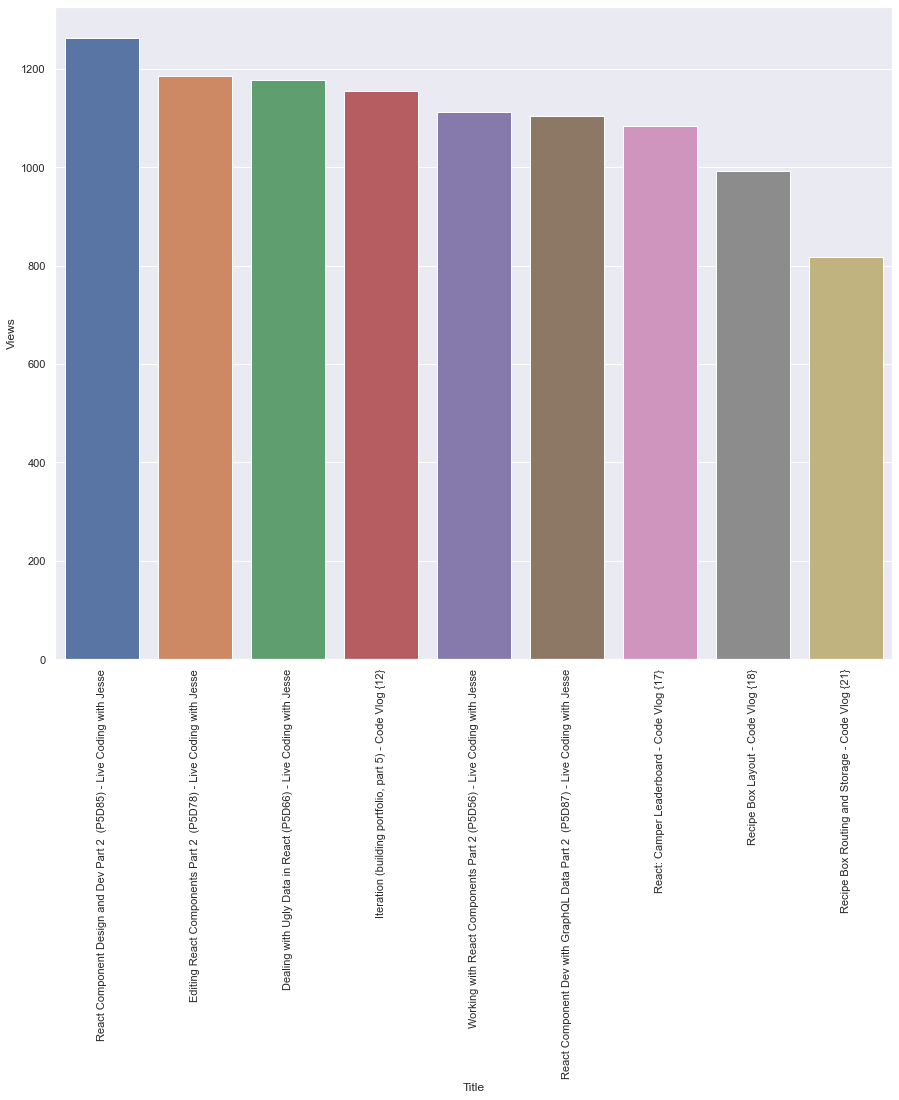

In [180]:
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
ax =  sns.barplot(x='Title', y='Views',data=worst_10_videos.sort_values('Views',ascending=False)[0:9])


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Views'>

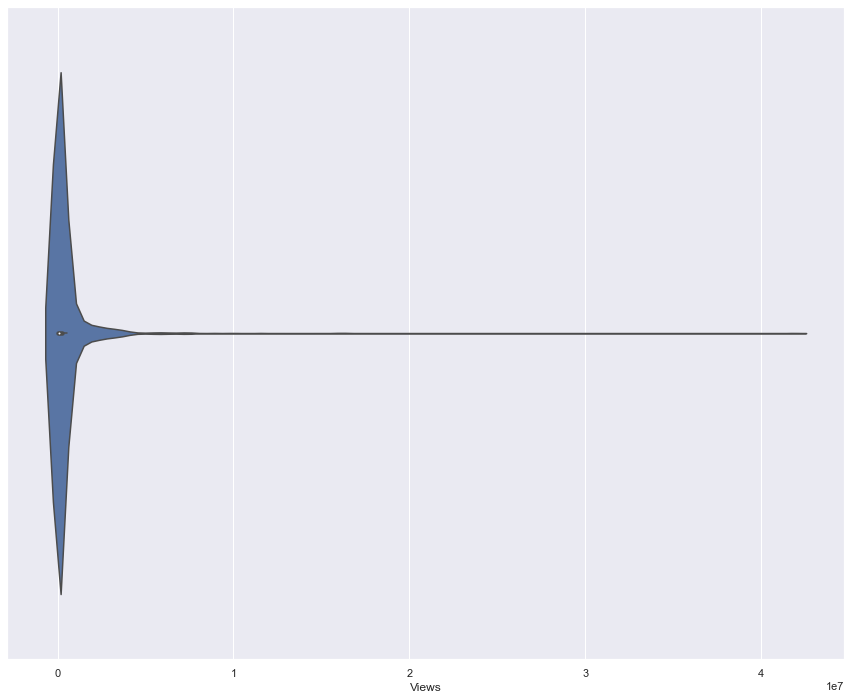

In [155]:
### Views distributions per videos 
# most videos are around 1 million views 

sns.violinplot(fcc_df['Views'])

In [164]:
# Over 1 million views 

over_1_million_views = fcc_df[fcc_df['Views']>1000000]
over_1_million_views.shape[0]

136

### Views vs Likes Vs Comments

<AxesSubplot:xlabel='Likes', ylabel='Views'>

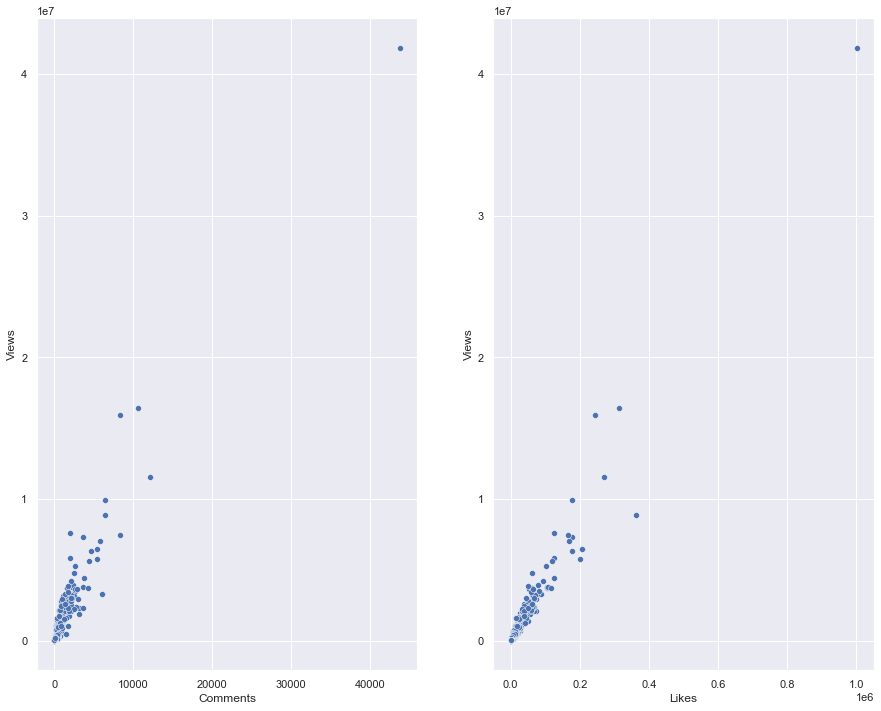

In [165]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data=fcc_df, x='Comments', y='Views', ax=ax[0])
sns.scatterplot(data=fcc_df, x='Likes', y='Views', ax=ax[1])

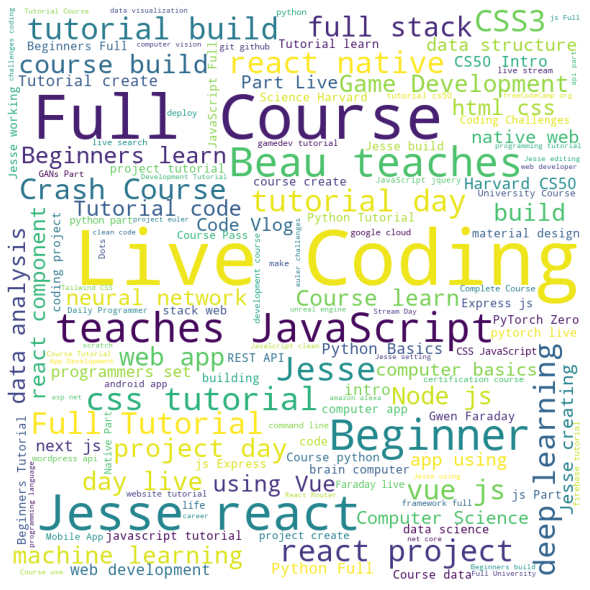

In [168]:
#reading the csv file

yt_comment_words = " "
stopwords = set(STOPWORDS)

# content is a columns in csv file
for value in fcc_df.Title:
    value = str(value)
    tokens = value.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        yt_comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800,height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(yt_comment_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()